# Task 1 - Learning Dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.linear_model import LinearRegression

import torch as tc

from rnn_template import rnn

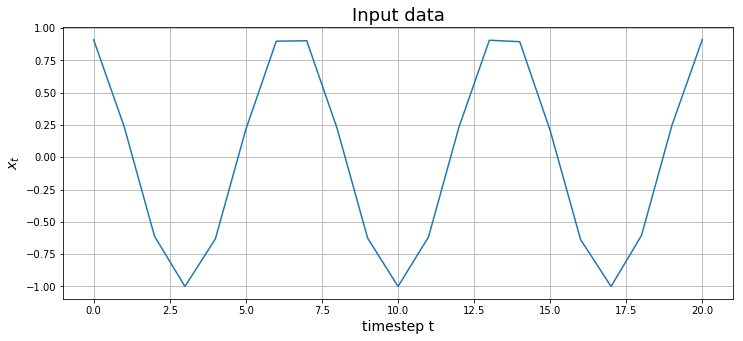

In [2]:
data = tc.load('sinus.pt')

fig1 = plt.subplots(figsize=[12,5])
plt.plot(data)
plt.xlabel('timestep t', fontsize = 14)
plt.ylabel(r'$x_t$', fontsize = 14)
plt.title('Input data', fontsize = 18)
plt.grid()
plt.show()

In [3]:
neurons = [2, 3, 4, 5]

for neuron in neurons:
    rnn(hidden_size=neuron)

KeyboardInterrupt: 

By doing an initial analysis with different number of hidden units, it can be noticed that the network is able to correctly reproduce the oscillation with 4 hidden units or more, so we fix the number of hidden units to 4.

 ### 1. Plot the losses as a function of gradient steps and vary the learning rate in the optimizer wrapper for stochastic gradient descent

In [ ]:
lrs = [0.1, 0.01, 0.001]

for lr in lrs:
    rnn(lr=lr)

### How does the loss behave depending on the learning rate?

It can be noticed that by using the biggest learning rate the loss function rapidly approaches to zero and then it starts oscillating a bit, while with the other smaller rates it approaches to zero more smoothly.

### 2. A scheme to speed up learning is to use momentum which keeps a moving average over the past gradients

In [ ]:
moms = [0.1, 0.01, 0.001]

for mom in moms:
    rnn(lr=0.1, momentum=mom)

### How do the dynamics change when the learning rate is adapted with momentum?

It can be noticed that with the biggest momentum the loss function doesn't end up in the highest peak, that corresponds to a local minimum: so adapting the rate with a momentum helps the learning of the network to reach a absolute minimum in the loss function.

### 3. How does the adaptive learning rate of the Adam optimizer perform in contrast to stochastic gradient descent?

In [ ]:
lrs = [0.1, 0.01, 0.001]

for lr in lrs:
    rnn(lr=lr, algo='Adam')

# Task 2 - Reservoir Computing

### 1. Initialize the weights Wxz and Wzz of the network by drawing from:
1. a standard normal, 
2. a uniform (in the interval (0, 1)) distribution
3. a random orthogonal matrix
### and plot the dynamics before any training.

In [ ]:
inits = ['Normal', 'Uniform', 'Orthogonal']

# dynamics before any training
for init in inits:
    rnn(lr=0.1, init=init, epochs = 0)

By initializing the weights with a normal standard distribution, the network is able to reproduce an oscillatory output (altough it's translated and with a different magnitude).

In [ ]:
for init in inits:
    rnn(lr=0.1, init=init)

It can be noticed that by initializing the weights from a random orthogonal matrix the network isn't able to correctly reproduce the oscillatory output.

### 2. Change the to-be-optimized parameters in an optimizer (of your choice) to only contain the output layer weights Wzx

In [ ]:
for init in inits:
    rnn(lr=0.1, init=init, only_output=True)

### Can you recover the oscillation? Which initialization works best?

By only optimizing the weights of the output layer, none of the different initialization is able to reproduce the output.